# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

**Before beginning assignment, import needed modules and dataframe.**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv('data/human_body_temperature.csv')
print(df.head())
print("Mean = " + str(np.mean(df['temperature'])))
print("Standard Deviation = " + str(np.std(df['temperature'])))
print("Number of samples = " + str(len(df['temperature'])))


   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
Mean = 98.24923076923075
Standard Deviation = 0.730357778905038
Number of samples = 130
RangeIndex(start=0, stop=130, step=1)


## Q1:  Is the dataset Normal?

**Define an expected cumulative distribution function**

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

**Create histogram of temperature measurements**

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


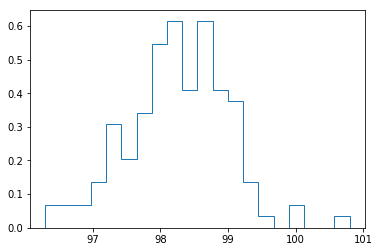

In [28]:
plt.hist(df['temperature'], bins=20, normed = True, histtype = 'step')
plt.show()


In [35]:
from scipy import stats
a=df['temperature']
k,p=stats.mstats.normaltest(a) # k = z-score returned by skewtest and k is the z-score returned by kurtosistest. p= p-value

print(k,p)
# we use p value to test if the variable is normal or not
if p<0.05:
  print('varible is not normal')
else:
  print('variable is normal')

2.703801433319203 0.2587479863488254
variable is normal


c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


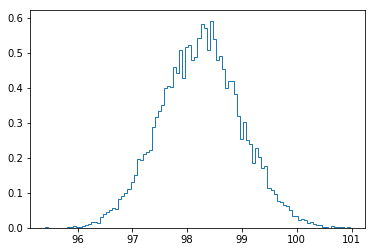

In [34]:

samples = np.random.normal(mean, std, size=10000) 
plt.hist(samples, bins=100, normed = True, histtype = 'step')
plt.show()



**Create scatter plot comparing ECDF of actual data to ECDF of dat

In [ ]:
x_theor,y_theor = ecdf(samples)
x, y = ecdf(df['temperature'])
plt.plot(x_theor,y_theor, marker = '.', linestyle = 'none')
plt.xlabel("temperature")
plt.plot(x,y, marker = '.', linestyle = 'none')
plt.show()
plt.plot(x,y, marker = '.', linestyle = 'none')

## Q2: Is the sample large?

The sample size is 130.  The CLT holds well for sample sizes greater then 30; therefore the sample size can be considered large in this application.

According to dummies.com:  
"The Central Limit Theorem (CLT for short) basically says that for non-normal data, the distribution of the sample means has an approximate normal distribution, no matter what the distribution of the original data looks like, as long as the sample size is large enough (usually at least 30) and all samples have the same size"



The following equation can also used to determine required sample sizes if varying confidence intervals are required for the Z score:  

$$Necessary Sample Size = (Z-score)^2 * StdDev*(1-StdDev) / (margin of error)^2$$



90% – Z Score = 1.645
95% – Z Score = 1.96
99% – Z Score = 2.576  

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/



In [6]:
#Calculate sample size: 
size = (len(df['temperature']))

#Calculate standard deviation
std = np.std(df['temperature'])

#Calculate necessary sample size (NSS), assuming a 95% confidence level (Z Score = 1.96) with a 5% margin of error:
NSS_a = (1.96**2*std*(1-std))/(0.05**2)
NSS_aa = (1.96**2*std*(1-std))/(0.1**2)
NSS_b = (1.645**2*std*(1-std))/(0.05**2)
NSS_bb = (1.645**2*std*(1-std))/(0.1**2)

print('The human temperature sample size is: ' + str(size))
print('The necessary sample size for a 95% confidence level and a 5% margin of error is ' + str(round(NSS_a,0)))
print('The necessary sample size for a 95% confidence level and a 10% margin of error is ' + str(round(NSS_aa,0)))
print('The necessary sample size for a 90% confidence level and a 5% margin of error is ' + str(round(NSS_b,0)))
print('The necessary sample size for a 90% confidence level and a 10% margin of error is ' + str(round(NSS_bb,0)))

The human temperature sample size is: 130
The necessary sample size for a 95% confidence level and a 5% margin of error is 303.0
The necessary sample size for a 95% confidence level and a 10% margin of error is 76.0
The necessary sample size for a 90% confidence level and a 5% margin of error is 213.0
The necessary sample size for a 90% confidence level and a 10% margin of error is 53.0


**As we can see, the required sample size is dependent on what is required.  We have a sample size large is a 95% confidence level is required with a 10% margin of error, but not a 5% margin of error.**

##  Q3: Is the true population mean really 98.6 degrees F?

The mean of the 130 samples is 98.2491, which is slightly different then 98.6.  We will test a null hypothesis that the mean of the population is 98.6 using a bootstrap test and a 5% confidence interval


The p-value is the probability of getting something more extreme than what we observed. 21.75
is 33.02 - 21.75 = 11.27 units away from the null hypothesis. So our p-value is the probability
of being more than 11.27 units away from 33.02. This is P(Test Stat < 21.75) + P(Test STat >
44.29). We don’t know the sampling distribution of our test statistic, but our bootstrap sample
lets us estimate this probability:
> (sum(bstrap < 21.75) + sum(bstrap > 44.29))/1000

**Define applicable functions**

98.24923076923075
0.730357778905038
11.40175425099138
-0.35076923076924515
-0.24307692307691298
p =  0.0
-0.35076923076924515
1.6448536269514722
0.0


c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


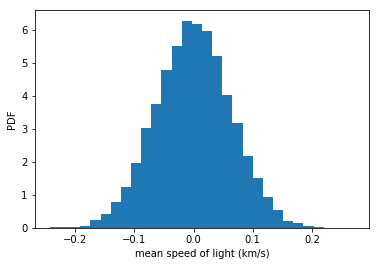

In [66]:
def diff_from_mean(data, diff= 98.6):
    return np.mean(data) -diff


def bootstrap_replicate_1d(data, func): 
#""Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

#Define bootstrap replicates function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates



#np.random.choice(df['temperature'], size=len(df['temperature']))

HypMean = 98.6
print(np.mean(df['temperature']))
print(np.std(df['temperature']))
print(np.sqrt(130))
diff_observed = diff_from_mean(np.mean(df['temperature']))
print(diff_observed)

# Make an array of translated impact forces: translated_force_b
translated_temp = df['temperature'] - np.mean(df['temperature']) + HypMean
#plt.plot(translated_temp)

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_temp, diff_from_mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = (np.sum(bs_replicates <= diff_observed))/10000
print(min(bs_replicates))

#P(Test Stat < 21.75) + P(Test STat >
#44.29)

# Print the p-value
print('p = ', p)
print(diff_observed)

_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF') 


#conf_int = np.percentile(bs_replicates, [0.00000000001, 99.99999999999])
#conf_int_org = np.percentile(df['temperature'], [2.5, 97.5])
#print(conf_int)
#print(conf_int_org)


value = stats.norm.ppf(.95)
print(value)
# confirm with cdf
p1 =stats.norm.cdf(value, 130)
print(p1)

**Although n>=30, a t test is most appropriate as we do not know the population standard deviation.**

**A t value can be calculated with the following equation:**  $$t = \frac{\overline{X} - \mu}{S\sqrt{n}} $$
**Critical values of the t distribution with 130 degrees of freedom: ** 
**t<sub>0.05</sub> = 1.658**
**t<sub>-0.05</sub> = -1.658**
**t<sub>0.1</sub> = 1.289** 
**t<sub>-0.1</sub> = -1.289** 
  
**Plugging in our known values, we get:**  $$t= \frac{98.6-98.249}{0.0329*11.4}$$  

**Doing the calculations:  **







In [38]:
mu = 80
Xbar = np.mean(df['temperature'])
S = np.std(df['temperature'])
n = len(df['temperature'])
print(S)
        
t= (Xbar - mu)/(S-np.sqrt(n))
print("t = " + str(t))

0.730357778905038
t = -1.710107090198185
